0       2015-12-27
1       2015-12-20
2       2015-12-13
3       2015-12-06
4       2015-11-29
           ...    
18244   2018-02-04
18245   2018-01-28
18246   2018-01-21
18247   2018-01-14
18248   2018-01-07
Name: Date, Length: 18249, dtype: datetime64[ns]

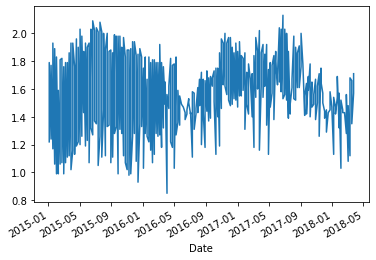

In [6]:
import pandas as pd

df = pd.read_csv("datasets/avocado.csv")
df['Date'] = pd.to_datetime(df['Date'])

albany_df = df[df['region']=="Albany"]
albany_df.set_index("Date", inplace=True)


albany_df["AveragePrice"].plot()
df['Date']


In [11]:
df = df.copy()[df['type'] == 'organic']
graph_df = pd.DataFrame()
for region in df['region'].unique()[:16]:
    print(region)
    region_df = df.copy()[df['region']==region]
    region_df.set_index('Date', inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f"{region}_price25ma"] = region_df["AveragePrice"].rolling(25).mean()

    if graph_df.empty:
        graph_df = region_df[[f"{region}_price25ma"]]  # note the double square brackets!
    else:
        graph_df = graph_df.join(region_df[f"{region}_price25ma"])

Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes


<AxesSubplot:xlabel='Date'>

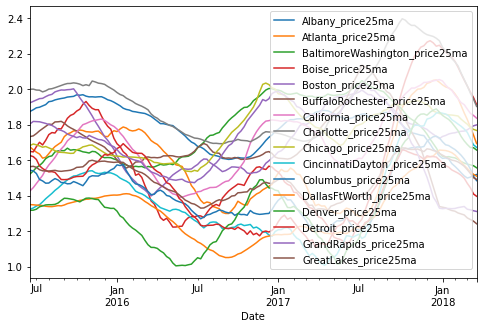

In [16]:
graph_df.dropna().plot(figsize=(8,5))